# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')

In [4]:
# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [5]:
# List files of ./data directory
!ls ./data

test.csv  train.csv


## 2. Load and Pre-process the data



In [6]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [7]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [8]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [12]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtypes.Float64DType'>


In [13]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

In [14]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [15]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [16]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [17]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [18]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [19]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [20]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [21]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.1)

In [22]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [23]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [25]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592 (2.31 KB)
Trainable params: 592 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [26]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

## 5. Train the network



In [27]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 2s 12ms/step - loss: 1.4915 - accuracy: 0.2494 - val_loss: 1.4122 - val_accuracy: 0.2350
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3661 - accuracy: 0.3072 - val_loss: 1.3414 - val_accuracy: 0.3300
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3028 - accuracy: 0.3656 - val_loss: 1.2943 - val_accuracy: 0.3800
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 1.2487 - accuracy: 0.4272 - val_loss: 1.2480 - val_accuracy: 0.4300
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 1.1899 - accuracy: 0.4817 - val_loss: 1.1884 - val_accuracy: 0.4700
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1242 - accuracy: 0.5383 - val_loss: 1.1212 - val_accuracy: 0.5150
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 1.0523 - accuracy: 0.5711 - val_loss: 1.0479 - val_accuracy: 0.5450
Epoch 8/100


In [28]:
# Import dependence for plotting training process
import matplotlib.pyplot as plt

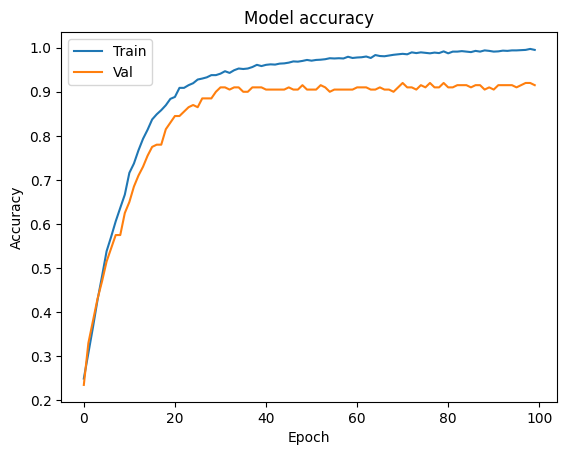

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

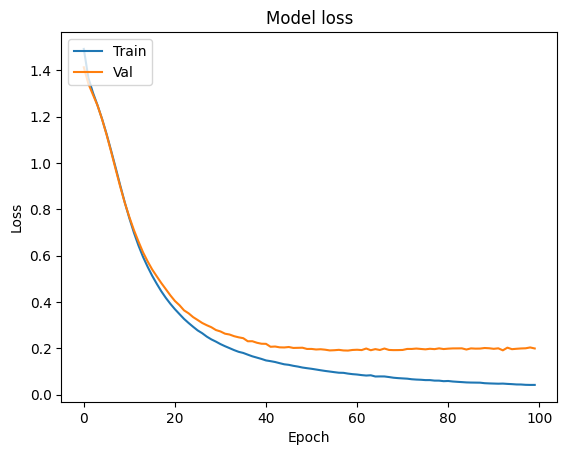

In [30]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [31]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# List files of ./models directory
!ls ./models

model_1.h5


# Exercise 1: Train the model without normalization

In [33]:
# Split data in training and validation partitions without normalization
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y_onehot,
                                                  test_size=0.1)

# Show sizes of partitions
print("Size of training data (without normalization): ", X_train_raw.shape)
print("Size of validation data (without normalization): ", X_val_raw.shape)


Size of training data (without normalization):  (1800, 20)
Size of validation data (without normalization):  (200, 20)


In [34]:
# Construcción del modelo
model_no_norm = Sequential()
model_no_norm.add(Dense(16, input_dim=20, activation='relu'))
model_no_norm.add(Dense(12, activation='relu'))
model_no_norm.add(Dense(4, activation='softmax'))

# Compilación del modelo
model_no_norm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history_no_norm = model_no_norm.fit(X_train_raw, y_train, epochs=100, batch_size=64, validation_data=(X_val_raw, y_val))


Epoch 1/100
29/29 [==============================] - 4s 52ms/step - loss: 130.9942 - accuracy: 0.3789 - val_loss: 81.4669 - val_accuracy: 0.3900
Epoch 2/100
29/29 [==============================] - 0s 11ms/step - loss: 48.1353 - accuracy: 0.3911 - val_loss: 22.9489 - val_accuracy: 0.4300
Epoch 3/100
29/29 [==============================] - 1s 19ms/step - loss: 21.8236 - accuracy: 0.4456 - val_loss: 17.2927 - val_accuracy: 0.4100
Epoch 4/100
29/29 [==============================] - 1s 22ms/step - loss: 16.0650 - accuracy: 0.4356 - val_loss: 13.4542 - val_accuracy: 0.4600
Epoch 5/100
29/29 [==============================] - 0s 12ms/step - loss: 12.7879 - accuracy: 0.4344 - val_loss: 10.4899 - val_accuracy: 0.4650
Epoch 6/100
29/29 [==============================] - 0s 16ms/step - loss: 9.8083 - accuracy: 0.4556 - val_loss: 7.9581 - val_accuracy: 0.4350
Epoch 7/100
29/29 [==============================] - 0s 11ms/step - loss: 7.7618 - accuracy: 0.4544 - val_loss: 6.8666 - val_accuracy: 0.

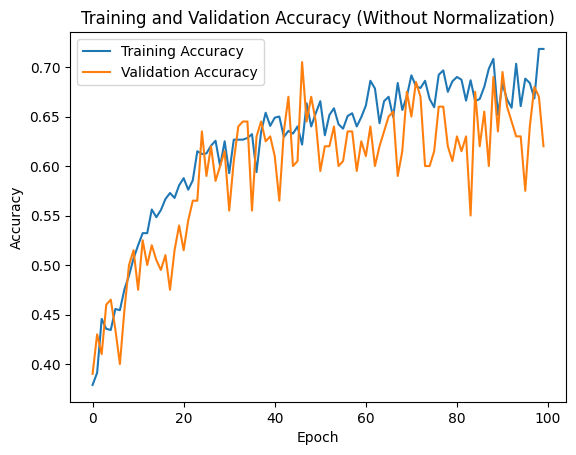

In [35]:
# Plot training and validation accuracy
plt.plot(history_no_norm.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_norm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Without Normalization)')
plt.legend()
plt.show()


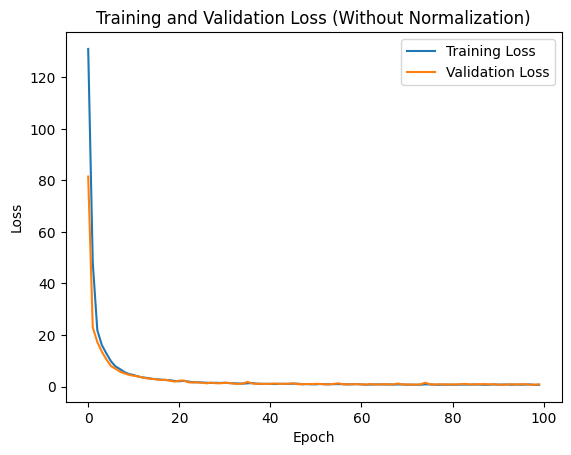

In [36]:
# Plot training and validation loss
plt.plot(history_no_norm.history['loss'], label='Training Loss')
plt.plot(history_no_norm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Without Normalization)')
plt.legend()
plt.show()


# Exercise 2: Train a simpler model and evaluate the results

In [37]:
# Split data in training and validation partitions with normalization
X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_norm, y_onehot, test_size=0.1)

# Show sizes of partitions
print("Size of training data (with normalization): ", X_train_norm.shape)
print("Size of validation data (with normalization): ", X_val_norm.shape)


Size of training data (with normalization):  (1800, 20)
Size of validation data (with normalization):  (200, 20)


In [38]:
# Diseño del modelo sin la segunda capa densa
model_simple = Sequential()
model_simple.add(Dense(16, input_dim=20, activation='relu'))
model_simple.add(Dense(4, activation='softmax'))

# Resumen del modelo
model_simple.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                336       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 404 (1.58 KB)
Trainable params: 404 (1.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Compilación del modelo
model_simple.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
# Entrenamiento del modelo
history_simple = model_simple.fit(X_train_norm, y_train, epochs=100, batch_size=64, validation_data=(X_val_norm, y_val))


Epoch 1/100
29/29 [==============================] - 2s 14ms/step - loss: 1.5817 - accuracy: 0.2972 - val_loss: 1.5406 - val_accuracy: 0.2750
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 1.4511 - accuracy: 0.3311 - val_loss: 1.4518 - val_accuracy: 0.3250
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3591 - accuracy: 0.3667 - val_loss: 1.3791 - val_accuracy: 0.3450
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2840 - accuracy: 0.4050 - val_loss: 1.3181 - val_accuracy: 0.3750
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2182 - accuracy: 0.4433 - val_loss: 1.2574 - val_accuracy: 0.4200
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 1.1579 - accuracy: 0.4867 - val_loss: 1.2008 - val_accuracy: 0.4650
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 1.1025 - accuracy: 0.5250 - val_loss: 1.1467 - val_accuracy: 0.4700
Epoch 8/100


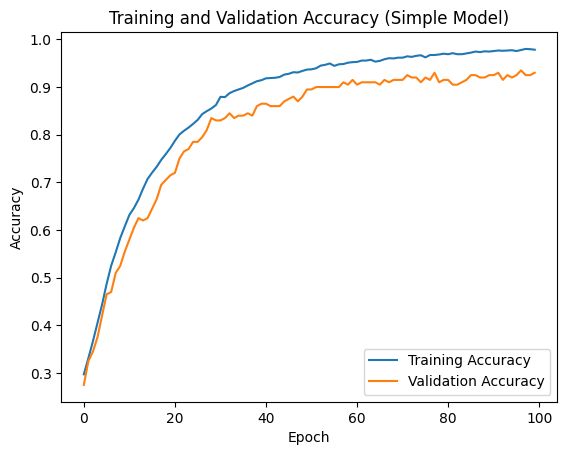

In [41]:
# Plot training and validation accuracy
plt.plot(history_simple.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Simple Model)')
plt.legend()
plt.show()


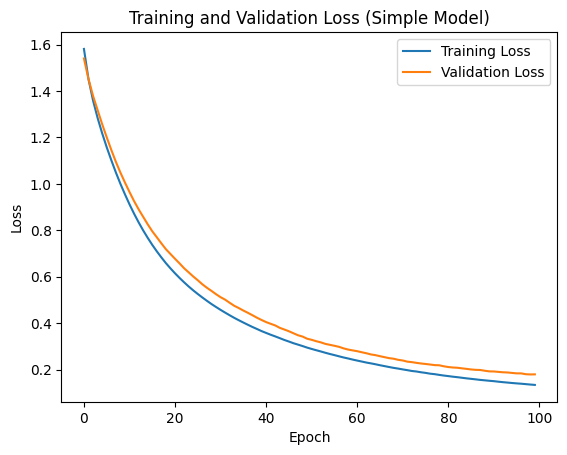

In [42]:
# Plot training and validation loss
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Simple Model)')
plt.legend()
plt.show()


# Exercise 3: Train a more complex model and evaluate the results

In [43]:
# Split data in training and validation partitions with normalization
X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_norm, y_onehot, test_size=0.1)

# Show sizes of partitions
print("Size of training data (with normalization): ", X_train_norm.shape)
print("Size of validation data (with normalization): ", X_val_norm.shape)


Size of training data (with normalization):  (1800, 20)
Size of validation data (with normalization):  (200, 20)


In [44]:
# Diseño del modelo con más neuronas en las capas densas
model_complex = Sequential()
model_complex.add(Dense(128, input_dim=20, activation='relu'))
model_complex.add(Dense(256, activation='relu'))
model_complex.add(Dense(4, activation='softmax'))

# Resumen del modelo
model_complex.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2688      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 36740 (143.52 KB)
Trainable params: 36740 (143.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Compilación del modelo
model_complex.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
# Entrenamiento del modelo
history_complex = model_complex.fit(X_train_norm, y_train, epochs=100, batch_size=64, validation_data=(X_val_norm, y_val))


Epoch 1/100
29/29 [==============================] - 3s 37ms/step - loss: 1.1259 - accuracy: 0.5017 - val_loss: 0.8641 - val_accuracy: 0.7250
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.7694 - val_loss: 0.5846 - val_accuracy: 0.8250
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8856 - val_loss: 0.4209 - val_accuracy: 0.8650
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.9167 - val_loss: 0.3373 - val_accuracy: 0.8900
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9428 - val_loss: 0.3011 - val_accuracy: 0.8900
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1938 - accuracy: 0.9550 - val_loss: 0.2486 - val_accuracy: 0.9250
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1611 - accuracy: 0.9611 - val_loss: 0.2336 - val_accuracy: 0.9050
Epoch 8/100


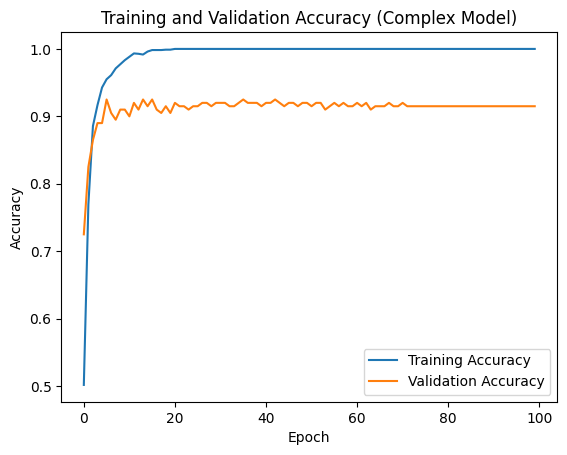

In [47]:
# Plot training and validation accuracy
plt.plot(history_complex.history['accuracy'], label='Training Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Complex Model)')
plt.legend()
plt.show()


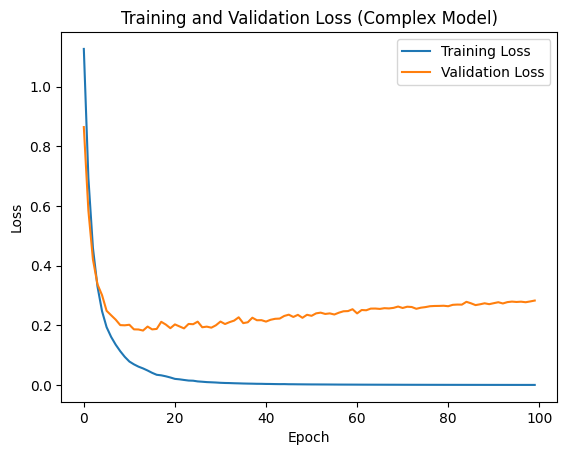

In [48]:
# Plot training and validation loss
plt.plot(history_complex.history['loss'], label='Training Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Complex Model)')
plt.legend()
plt.show()


# Exercise 4: Predict the price range of the phones of the test.csv file

In [49]:
# Leer los datos de prueba desde el archivo CSV
test_data = pd.read_csv('./data/test.csv')

# Mostrar las primeras filas de los datos de prueba
test_data.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [50]:
# Mostrar los nombres de las columnas en los datos de prueba
print(test_data.columns)


Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [56]:
# Convertir los datos de prueba a un arreglo numpy
test_data_numpy = test_data.values


In [52]:
# Mostrar la forma de los datos de prueba
print("Shape of test data:", test_data_numpy.shape)


Shape of test data: (1000, 21)


In [54]:
# Eliminar la columna 'id' de los datos de prueba antes de la normalización
test_data = test_data.drop('id', axis=1)

In [57]:
# Normalizar los datos de prueba utilizando la media y la desviación estándar del conjunto de entrenamiento
X_test_norm = sc.transform(test_data_numpy)


In [58]:
# Mostrar datos de prueba antes y después de la normalización
print("Data before normalization:\n", test_data.head())
print("\nData after normalization:\n", X_test_norm[:5])


Data before normalization:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touc

In [59]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [60]:
# Predict price range
predictions = model.predict(X_test_norm)


32/32 [==============================] - 0s 3ms/step


In [61]:
# Show predictions
print(predictions)


[[5.3958378e-24 5.8268727e-13 5.3441383e-02 9.4655865e-01]
 [6.5000621e-33 2.2308621e-18 4.3627599e-04 9.9956375e-01]
 [8.8844219e-20 1.3127561e-09 9.5240164e-01 4.7598381e-02]
 ...
 [1.8273358e-01 8.1726623e-01 1.6238705e-07 5.1065647e-15]
 [1.9922671e-11 9.0890902e-04 9.9908423e-01 6.8925360e-06]
 [4.0198996e-17 1.0871353e-06 9.9999201e-01 6.9701687e-06]]


In [62]:
# Convertir predicciones de codificación one-hot a valores escalares
predicted_labels = np.argmax(predictions, axis=1)


In [63]:
# Mostrar todas las predicciones en forma de valores escalares
print(predicted_labels)


[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 2 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 2 0 3 0 3 1 0 3 3 2 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 3 1 0 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 2 2 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 0 0 1 2 1 2 3 3 0 2 0 3 2 3
 3 1 0 1 1 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 3 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 1 2 2 3 1 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

In [64]:
import pandas as pd

# Crear un DataFrame con el primer ejemplo de prueba
first_test_sample = pd.DataFrame(data=X_test_norm[0:1], columns=test_data.columns)

# Mostrar el primer ejemplo de prueba en formato de DataFrame
print(first_test_sample)


   battery_power      blue  clock_speed  dual_sim       fc    four_g  \
0       -0.44506  1.010051     0.340463  0.981177  2.23265 -1.043966   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0    -1.49089 -1.393304   1.490528 -0.664768  1.003414  -0.944639  0.371413   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  1.246506 -0.072765  0.283103  -1.649584 -1.786861      0.994018 -1.014099  


In [65]:
# Mostrar la predicción para el primer ejemplo de prueba
print("Prediction for the first test sample:", predicted_labels[0])


Prediction for the first test sample: 3
